In [1]:
# Chargement des différentes librairies permettant d'analyser et visualiser le jeu de données
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
#modification du paramétrage afin d'afficher toutes les lignes et toutes les colonnes
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
# Chargement du dataset et aperçue d'un échantillon aléatoire des données
dataset = pd.read_csv("Speed+Dating+Data.csv", encoding="cp1252")
dataset.sample(10)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
5796,381,3.0,0,5,2,15,19,5,5.0,5,15,411.0,0,0.41,1,34.0,2.0,35.0,15.0,15.0,25.0,10.0,0.0,0,6.0,7.0,6.0,2.0,5.0,5.0,2.0,4.0,2.0,24.0,Film,14.0,NYU,"1,340.00","25,380.00",2.0,6.0,3.0,California,"92,833",NaN,5.0,4.0,1.0,Screenwriter,6.0,5.0,5.0,5.0,7.0,8.0,8.0,6.0,5.0,6.0,9.0,6.0,4.0,8.0,7.0,8.0,8.0,7.0,2.0,NaN,20.0,10.0,20.0,35.0,5.0,10.0,40.0,5.0,20.0,15.0,10.0,10.0,40.0,5.0,20.0,15.0,10.0,10.0,7.0,7.0,10.0,9.0,8.0,7.0,8.0,8.0,9.0,9.0,0,4.0,8.0,8.0,7.0,7.0,6.0,5.0,5.0,2.0,3.0,15.0,10.0,10.0,40.0,5.0,20.0,7.0,8.0,8.0,9.0,9.0,5.0,1.0,3.0,40.0,15.0,20.0,15.0,5.0,5.0,20.0,20.0,20.0,30.0,5.0,5.0,35.0,10.0,10.0,15.0,15.0,15.0,30.0,10.0,10.0,20.0,5.0,25.0,7.0,8.0,8.0,8.0,9.0,7.0,7.0,8.0,9.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7716,522,14.0,0,27,2,21,22,4,4.0,6,21,551.0,0,0.40,0,27.0,1.0,40.0,20.0,20.0,20.0,0.0,0.0,1,7.0,7.0,8.0,4.0,7.0,5.0,7.0,6.0,2.0,22.0,Law,1.0,Georgetown,"1,400.00","25,425.00",2.0,3.0,6.0,Pennsylvania,"19,087","71,787.00",1.0,6.0,2.0,Assistant District Attorney,1.0,6.0,6.0,6.0,7.0,8.0,9.0,3.0,3.0,7.0,9.0,8.0,10.0,10.0,7.0,7.0,5.0,3.0,5.0,NaN,10.0,20.0,15.0,20.0,15.0,20.0,10.0,20.0,15.0,20.0,15.0,20.0,20.0,15.0,15.0,20.0,10.0,20.0,7.0,7.0,7.0,9.0,8.0,8.0,7.0,9.0,9.0,9.0,0,3.0,9.0,7.0,3.0,5.0,3.0,5.0,6.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,3.0,2.0,20.0,10.0,10.0,30.0,0.0,30.0,15.0,15.0,20.0,20.0,10.0,20.0,15.0,15.0,20.0,20.0,10.0,20.0,20.0,15.0,20.0,20.0,10.0,15.0,7.0,8.0,9.0,9.0,7.0,8.0,7.0,9.0,9.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7223,489,9.0,1,18,2,19,15,6,13.0,10,3,468.0,0,-0.16,0,25.0,6.0,15.0,25.0,15.0,15.0,15.0,15.0,0,8.0,7.0,7.0,6.0,7.0,6.0,7.0,7.0,2.0,28.0,Business,8.0,Cornell,"1,360.00","26,062.00",2.0,6.0,5.0,Greece,"10,025",NaN,3.0,2.0,1.0,Business,7.0,7.0,7.0,7.0,9.0,9.0,9.0,6.0,9.0,9.0,6.0,6.0,9.0,9.0,9.0,7.0,6.0,5.0,6.0,NaN,20.0,10.0,20.0,20.0,20.0,0.0,60.0,0.0,0.0,40.0,0.0,0.0,20.0,20.0,20.0,20.0,20.0,0.0,6.0,8.0,8.0,9.0,10.0,7.0,8.0,9.0,7.0,10.0,1,8.0,8.0,9.0,7.0,8.0,7.0,8.0,8.0,0.0,NaN,9.0,9.0,9.0,9.0,10.0,5.0,7.0,8.0,7.0,7.0,10.0,6.0,1.0,3.0,30.0,10.0,20.0,20.0,10.0,10.0,30.0,10.0,20.0,20.0,10.0,10.0,50.0,0.0,0.0,50.0,0.0,0.0,10.0,20.0,20.0,20.0,20.0,10.0,7.0,8.0,9.0,8.0,10.0,7.0,8.0,9.0,7.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

### PART1. Analyse globale du jeu de données

In [4]:
print("Dans sa version complète, le dataset comporte {} colonnes et {} lignes".format(dataset.shape[1], dataset.shape[0]))

Dans sa version complète, le dataset comporte 195 colonnes et 8378 lignes


- Sur 195 variables 187 sont des chiffres (13 entiers, 174 décimales), le solde étant du texte (object).

A noter cependant que beaucoup de variables de type entiers font en fait référence des données qualitatives nominales (ex le genre, codé 1 ou 0).

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


In [6]:
dataset.describe(include="all")

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8315,8296.000000,4914,3133,3583,8315.000000,8299.000000,8299.000000,8299,7314,4279,8299.000000,8281.000000,8299.000000,8289,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,NaN,241,68,115,NaN,NaN,NaN,269,409,261,NaN,NaN,NaN,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

- le jeu de données semble être d'une qualité assez moyenne. Beaucoup de variables ont des donnnées manquantes (attr/sinc/fun/amb/intel). cela dit, cela peut parfois être lié au fait que ces colonnes ne concernent pas forcément toutes les lignes.

In [7]:
dataset.isna().sum().sort_values(ascending=False)

num_in_3    7710
numdat_3    6882
expnum      6578
sinc7_2     6423
amb7_2      6423
shar7_2     6404
attr7_2     6394
intel7_2    6394
fun7_2      6394
amb5_3      6362
attr7_3     6362
sinc7_3     6362
intel7_3    6362
fun7_3      6362
amb7_3      6362
shar7_3     6362
shar2_3     6362
attr5_3     6362
sinc5_3     6362
intel5_3    6362
fun5_3      6362
attr4_3     5419
sinc4_3     5419
intel4_3    5419
fun4_3      5419
amb4_3      5419
shar4_3     5419
attr2_3     5419
sinc2_3     5419
fun2_3      5419
intel2_3    5419
amb2_3      5419
mn_sat      5245
tuition     4795
you_call    4404
shar1_3     4404
date_3      4404
attr1_3     4404
sinc1_3     4404
intel1_3    4404
fun1_3      4404
amb1_3      4404
attr3_3     4404
sinc3_3     4404
intel3_3    4404
fun3_3      4404
amb3_3      4404
them_cal    4404
fun3_s      4378
intel3_s    4378
sinc3_s     4378
amb3_s      4378
attr3_s     4378
fun1_s      4282
intel1_s    4282
amb1_s      4282
attr1_s     4282
sinc1_s     4282
shar1_s     42

- la lecture du guide descriptif des données nous apprend que :
    - certaines données qualitative ont été transformées en données quantitatives discrète. Nous allons par la suite, et lorsque nécessaire, rajouter une colonne avec les valeurs réencodées. Cela sera utile lors de l'analyse.
    - certaines données quantitatives ont des échelles différentes, alors qu'elles sont censées pouvoir être comparées (par exemple attr1_1 en fonction de la wave). Néanmoins, une normalisation a du avoir lieu car les valeurs rencontrées semblent être sur une même échelle au final.

Dans la suite de ce notebook, nous allons travailler sur des sous dataset, comprenant une partie plus réduite et plus homogène des variables en fonction des sujets.

### PART2. Pourquoi match-t-on au 1er rendez-vous?

Nous avons sélectionné un jeu de données qui nous semblait cohérentes entre elles au regard d'une rencontre (wave).

In [57]:
dataset_rencontre = pd.DataFrame(data=dataset, columns=["gender","match", "int_corr", "samerace", "age","age_o", "condtn", "position", "order","wave","dec_o","attr_o","pf_o_att","round","goal",
                                                        "date","go_out", "dec","attr","sinc","intel", "fun","amb","shar","like","prob","met"])
dataset_rencontre.head(10)

,gender,match,int_corr,samerace,age,age_o,condtn,position,order,wave,dec_o,attr_o,pf_o_att,round,goal,date,go_out,dec,attr,sinc,intel,fun,amb,shar,like,prob,met
0,0,0,0.14,0,21.0,27.0,1,7,4,1,0,6.0,35.00,10,2.0,7.0,1.0,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0
1,0,0,0.54,0,21.0,22.0,1,7,3,1,0,7.0,60.00,10,2.0,7.0,1.0,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0
2,0,1,0.16,1,21.0,22.0,1,7,10,1,1,10.0,19.00,10,2.0,7.0,1.0,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0
3,0,1,0.61,0,21.0,23.0,1,7,5,1,1,7.0,30.00,10,2.0,7.0,1.0,1,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,2.0
4,0,1,0.21,0,21.0,24.0,1,7,7,1,1,8.0,30.00,10,2.0,7.0,1.0,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,2.0
5,0,0,0.25,0,21.0,25.0,1,7,6,1,1,7.0,50.00,10,2.0,7.0,1.0,0,4.0,9.0,7.0,4.0,6.0,4.0,6.0,5.0,2.0
6,0,0,0.34,0,21.0,30.0,1,7,1,1,0,3.0,35.00,10,2.0,7.0,1.0,1,7.0,6.0,7.0,4.0,6.0,7.0,6.0,5.0,2.0
7,0,0,0.50,0,21.0,27.0,1,7,2,1,0,6.0,33.33,10,2.0,7.0,1.0,0,4.0,9.0,7.0,6.0,5.0,6.0,6.0,7.0,NaN
8,0,1,0.28,0,21.0,28.0,1,7,8,1,1,7.0,50.00,10,2.0,7.0,1.0,1,7.0,6.0,8.0,9.0,8.0,8.0,7.0,7.0,2.0
9,0,0,-0.36,0,21.0,24.0,1,7,9,1,0,6.0,100.00,10,2.0,7.0,1.0,1,5.0,6.0,6.0,8.0,10.0,8.0,6.0,6.0,2.0


In [58]:
print("Ce sous dataset comporte {} colonnes et {} lignes".format(dataset_rencontre.shape[1], dataset_rencontre.shape[0]))

Ce sous dataset comporte 27 colonnes et 8378 lignes


In [59]:
# Vérification présence valeur nulle
dataset_rencontre.isna().sum().sort_values(ascending=False)

shar        1067
amb          712
met          375
fun          350
prob         309
intel        296
sinc         277
like         240
attr_o       212
attr         202
int_corr     158
age_o        104
date          97
age           95
pf_o_att      89
goal          79
go_out        79
gender         0
dec            0
match          0
dec_o          0
wave           0
order          0
position       0
condtn         0
samerace       0
round          0
dtype: int64

In [60]:
# suppression des lignes avec valeurs nulle dans la mesure ou leur poids est limité au regard de la taille du dataset
dataset_rencontre = dataset_rencontre.dropna(axis=0)

In [61]:
# vérification travail fait
dataset_rencontre.isna().sum().sort_values(ascending=False)

gender      0
goal        0
prob        0
like        0
shar        0
amb         0
fun         0
intel       0
sinc        0
attr        0
dec         0
go_out      0
date        0
round       0
match       0
pf_o_att    0
attr_o      0
dec_o       0
wave        0
order       0
position    0
condtn      0
age_o       0
age         0
samerace    0
int_corr    0
met         0
dtype: int64

In [62]:
print("Ce sous dataset comporte maintenant {} lignes".format(dataset_rencontre.shape[0]))

Ce sous dataset comporte maintenant 6570 lignes


<Axes: >

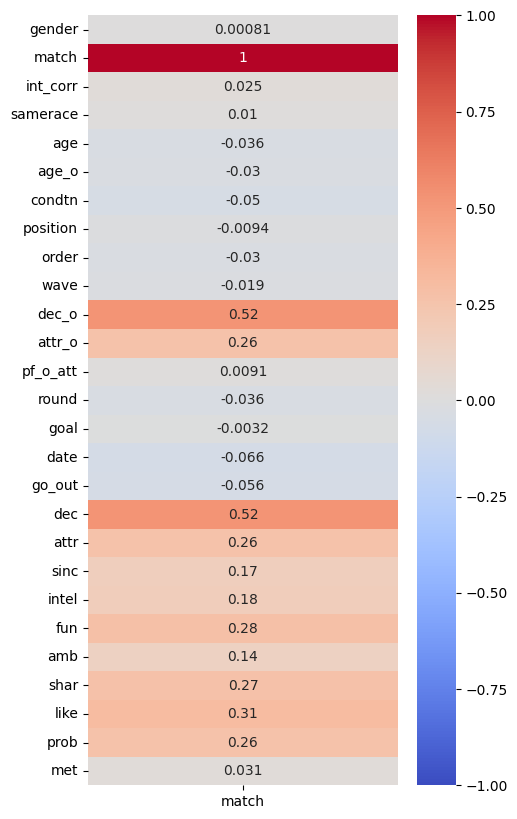

In [66]:
# visualisation correlation entre la variable match et les autres variables sélectionnées
fig, ax = plt.subplots(figsize=(5, 10))
sns.heatmap(dataset_rencontre.corr()[["match"]], vmin=-1, vmax=1, annot=True, cmap="coolwarm")

Certaines variables ont une corrélation avec la variable "match" qui est plus important si :
- les partenaires souhaitent se revoir (dec_o et dec) => la correlation avec le matching apparait assez logique et n'apporte donc pas grand chose selon nous.
- si l'évaluation par l'autre partenaire sur les 6 critères (attr_o) est plus élevée (attractive, sincere, intelligent, fun, ambitious, shared interest/hobbies)
- si la notation par le partenaire sur 6 critères est élevé (similaire au point ci dessus). Sur ce point, nous relèverons que :
    - le fun, l'attractivité, le partage d'intérêts sont plus importants que la sincérité, l'intelligence et l'ambition

De manière plus surprenante, nous relèverons également que la corrélation entre les centres d'intérêts des deux paricipants (int_corr) et le match est faible

In [33]:
# nous pouvons aussi matérialiser cette relation à travers un graphique représentant pour chaque variable la distribution en fonction de la variable "match"
for name in dataset_rencontre.columns :
    if name != "match" :
        print("Distribution pour la varaible {}".format(name))
        fig = px.histogram(dataset_rencontre, x=name, color="match", width = 600, height=400)
        fig.show()

Distribution pour la varaible gender


Distribution pour la varaible int_corr


Distribution pour la varaible samerace


Distribution pour la varaible age


Distribution pour la varaible age_o


Distribution pour la varaible condtn


Distribution pour la varaible position


Distribution pour la varaible order


Distribution pour la varaible wave


Distribution pour la varaible dec_o


Distribution pour la varaible attr_o


Distribution pour la varaible pf_o_att


Distribution pour la varaible round


Distribution pour la varaible goal


Distribution pour la varaible date


Distribution pour la varaible go_out


In [34]:
# certaines wave semble avoir un taux de matching plus important
mask1 = dataset_rencontre.match == 1
for i in range(1,22) :
    mask2 = dataset_rencontre.wave == i
    score_match = (len(dataset_rencontre.loc[mask1&mask2,"wave"]) / len(dataset_rencontre.loc[mask2,"wave"]))*100
    print("le taux de matching est de {}% pour la wave {}".format(round(score_match,1), i))

le taux de matching est de 31.2% pour la wave 1
le taux de matching est de 10.4% pour la wave 2
le taux de matching est de 13.8% pour la wave 3
le taux de matching est de 19.9% pour la wave 4
le taux de matching est de 30.6% pour la wave 5
le taux de matching est de 20.0% pour la wave 6
le taux de matching est de 16.9% pour la wave 7
le taux de matching est de 18.5% pour la wave 8
le taux de matching est de 15.5% pour la wave 9
le taux de matching est de 18.5% pour la wave 10
le taux de matching est de 14.6% pour la wave 11
le taux de matching est de 10.5% pour la wave 12
le taux de matching est de 15.8% pour la wave 13
le taux de matching est de 18.4% pour la wave 14
le taux de matching est de 19.4% pour la wave 15
le taux de matching est de 25.3% pour la wave 16
le taux de matching est de 17.1% pour la wave 17
le taux de matching est de 8.3% pour la wave 18
le taux de matching est de 16.7% pour la wave 19
le taux de matching est de 11.9% pour la wave 20
le taux de matching est de 16.

Certaines wave ont des taux de matching plus important. Cela pourrait être mis en corrélation avec les variations proposées (ou non) pour ces waves.
Par exemple la wave 5 (undergrads) a un taux parmis les plus élevé. Les autres varaiations ne semble pas avoir apporté de bénéfice sur le taux de matching.

### PART3. Quels sont les attentes/Objectifs des participants lors d'une rencontre

Nous avons selectionné un ensemble de données relatives aux attentes ou objectifs d'un participant à une rencontre.
Cela permettra de mettre en avant les critères principaux.
Nous pouvons penser que ces critères permettrait de faciliter un "match" et donc une deuième rencontre.

In [40]:
features_objectifs = ["iid","age", "race", "gender", "field_cd", "mn_sat", "wave","imprace","imprelig","goal","sports","tvsports","exercise","dining", "museums","art", "hiking","gaming","clubbing","reading","tv", "theater","movies","concerts","music",
 "shopping","yoga","exphappy","attr1_1","sinc1_1","intel1_1","fun1_1","amb1_1", "shar1_1"]
dataset_objectifs = dataset.loc[:,features_objectifs]

In [41]:
print("Ce sous dataset comporte {} colonnes et {} lignes".format(dataset_objectifs.shape[1], dataset_objectifs.shape[0]))

Ce sous dataset comporte 34 colonnes et 8378 lignes


In [19]:
dataset_objectifs.sample(10)

,iid,age,race,gender,field_cd,mn_sat,wave,imprace,imprelig,goal,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
1158,84,32.0,3.0,0,10.0,NaN,4,1.0,1.0,2.0,7.0,1.0,9.0,9.0,9.0,9.0,3.0,1.0,9.0,9.0,1.0,9.0,10.0,9.0,9.0,5.0,5.0,7.0,30.00,30.00,30.00,5.00,0.00,5.00
3317,229,28.0,2.0,1,10.0,NaN,9,7.0,1.0,1.0,8.0,5.0,7.0,7.0,1.0,1.0,5.0,3.0,3.0,8.0,5.0,1.0,5.0,2.0,6.0,1.0,1.0,3.0,21.43,16.67,21.43,16.67,11.90,11.90
6333,410,27.0,2.0,1,8.0,"1,360.00",15,8.0,8.0,1.0,10.0,8.0,5.0,8.0,1.0,1.0,8.0,10.0,1.0,8.0,2.0,2.0,4.0,4.0,5.0,1.0,1.0,5.0,20.00,20.00,20.00,20.00,10.00,10.00
1487,102,32.0,2.0,1,10.0,NaN,4,2.0,6.0,1.0,9.0,9.0,9.0,9.0,4.0,4.0,7.0,2.0,5.0,5.0,4.0,4.0,9.0,3.0,5.0,5.0,2.0,6.0,30.00,10.00,30.00,20.00,10.00,0.00
3489,243,27.0,2.0,1,16.0,"1,450.00",10,2.0,3.0,2.0,7.0,2.0,7.0,9.0,5.0,8.0,5.0,7.0,3.0,9.0,5.0,5.0,9.0,8.0,8.0,6.0,2.0,6.0,20.00,20.00,20.00,25.00,5.00,10.00
3287,227,26.0,2.0,1,8.0,NaN,9,7.0,7.0,2.0,7.0,7.0,7.0,10.0,9.0,7.0,2.0,6.0,5.0,10.0,8.0,8.0,9.0,5.0,7.0,5.0,1.0,5.0,20.00,16.00,18.00,16.00,16.00,14.00
4976,336,25.0,3.0,1,17.0,"1,110.00",13,1.0,5.0,1.0,5.0,4.0,4.0,5.0,8.0,10.0,4.0,1.0,1.0,9.0,4.0,6.0,10.0,10.0,10.0,3.0,4.0,4.0,20.00,15.00,30.00,10.00,15.00,10.00
4616,305,29.0,4.0,0,9.0,NaN,12,6.0,9.0,1.0,8.0,2.0,7.0,10.0,7.0,7.0,8.0,2.0,7.0,8.0,7.0,8.0,9.0,7.0,7.0,9.0,8.0,4.0,10.00,47.00,16.00,12.00,3.00,12.00
3080,217,26.0,2.0,1,10.0,NaN,9,8.0,1.0,5.0,1.0,2.0,8.0,7.0,8.0,8.0,10.0,1.0,2.0,10.0,4.0,8.0,6.0,10.0,10.0,1.0,7.0,3.0,21.28,17.02,21.28,12.77,6.38,21.28
7205,487,24.0,4.0,1,6.0,"1,400.00",19,1.0,1.0,1.0,4.0,4.0,2.0,8.0,5.0,3.0,2.0,5.0,2.0,7.0,8.0,5.0,9.0,6.0,10.0,6.0,2.0,5.0,25.00,26.00,15.00,10.00,9.00,15.00


In [42]:
# élimination des lignes en doublons (dataset comporte plusieurs lignes pour le même id) or les données que nous utilisons devraient être les mêmes pour un id dentique (colonne iid)
# on ne garde qu'un id
dataset_objectifs = dataset_objectifs.drop_duplicates(subset="iid", keep="first")

In [43]:
print("Ce sous dataset comporte maintenant {} lignes".format(dataset_objectifs.shape[0]))

Ce sous dataset comporte maintenant 551 lignes


In [44]:
# verification des valeurs nulles
dataset_objectifs.isna().sum().sort_values(ascending=False)

# mn_sat (proxy intelligence) est une variable peu peuplée (plus de 50% manquant). Nous allons l'éliminer.

mn_sat      349
shar1_1      10
amb1_1        9
exphappy      8
age           8
fun1_1        8
intel1_1      7
sinc1_1       7
attr1_1       7
clubbing      7
shopping      7
music         7
concerts      7
movies        7
theater       7
tv            7
reading       7
yoga          7
gaming        7
hiking        7
art           7
museums       7
dining        7
exercise      7
tvsports      7
sports        7
goal          7
imprelig      7
imprace       7
field_cd      7
race          6
wave          0
gender        0
iid           0
dtype: int64

In [45]:
# élimination colonne mn_sat
dataset_objectifs.drop(columns="mn_sat", inplace=True)

In [46]:
# problème de catégorie de variables pas au format numérique
for i in dataset_objectifs.columns :
    dataset_objectifs[i] = pd.to_numeric(dataset_objectifs[i], errors='coerce')

In [47]:
# pour certaines colonnes où le nombre de valeurs manquantes est limité, nous allons les remplacer par la médiane (maintien les valeurs entières et plus robuste que moyenne si outliers)
for i in dataset_objectifs.iloc[:,1:].columns :
    dataset_objectifs[i].fillna(dataset_objectifs[i].median(), inplace=True) # mode pour valeur la plus fréquente

In [48]:
# verification des valeurs nulles
dataset_objectifs.isna().sum().sort_values(ascending=False)

iid         0
clubbing    0
amb1_1      0
fun1_1      0
intel1_1    0
sinc1_1     0
attr1_1     0
exphappy    0
yoga        0
shopping    0
music       0
concerts    0
movies      0
theater     0
tv          0
reading     0
gaming      0
age         0
hiking      0
art         0
museums     0
dining      0
exercise    0
tvsports    0
sports      0
goal        0
imprelig    0
imprace     0
wave        0
field_cd    0
gender      0
race        0
shar1_1     0
dtype: int64

In [49]:
# encodage de certaines colonnes pour faciliter l'analyse et la visualisation
dataset_objectifs["gender_cat"] = dataset_objectifs["gender"].map({1:'Male', 0:'Female'})

dataset_objectifs["race_cat"]=dataset_objectifs["race"].map({1:"Black/African American", 2:"European/Caucasian-American", 3:"Latino/Hispanic American", 4:"Asian/Pacific Islander/Asian-American", 5:"Native American", 6:"Other"})

dataset_objectifs["field_cd_cat"]=dataset_objectifs["field_cd"].map({1:"Law", 2:"Math", 3:"Social Science, Psychologist", 4:"Medical Science, Pharmaceuticals, and Bio Tech", 5:"Engineering",
                                                 6:"English/Creative Writing/ Journalism", 7:"History/Religion/Philosophy", 8:"Business/Econ/Finance", 9:"Education, Academia",
                                                 10:"Biological Sciences/Chemistry/Physics", 11:"Social Work", 12:"Undergrad/undecided", 13:"Political Science/International Affairs", 14:"Film",
                                                 15:"Fine Arts/Arts Administration", 16:"Languages", 17:"Architecture", 18:"Other"})

dataset_objectifs["goal_cat"]=dataset_objectifs["goal"].map({1:"Seemed like a fun night out", 2:"To meet new people", 3:"To get a date", 4:"Looking for a serious relationship", 5:"To say I dit it", 6:"Other"})

In [51]:
# encodage de l'age en fonction de categories en créant une nouvelle colonne
bins = [0, 25, 30, 40, 100]
labels = ["moins de 25 ans", "entre 25 ans et 30 ans", "entre 30 ans et 40 ans", "Plus de 40 ans"]
dataset_objectifs["age_cat"] = pd.cut(dataset_objectifs["age"], bins=bins, labels=labels, include_lowest=True)

In [52]:
dataset_objectifs.sample(5)

,iid,age,race,gender,field_cd,wave,imprace,imprelig,goal,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,gender_cat,race_cat,field_cd_cat,goal_cat,age_cat
4032,274,24.0,3.0,1,3.0,11,3.0,3.0,3.0,3.0,3.0,4.0,7.0,6.0,5.0,4.0,5.0,1.0,10.0,7.0,6.0,8.0,9.0,10.0,8.0,7.0,6.0,30.0,10.0,20.0,20.0,10.0,10.0,Male,Latino/Hispanic American,"Social Science, Psychologist",To get a date,moins de 25 ans
6891,467,24.0,2.0,0,8.0,19,7.0,4.0,6.0,8.0,4.0,9.0,9.0,9.0,9.0,8.0,5.0,8.0,9.0,8.0,9.0,9.0,9.0,9.0,9.0,9.0,7.0,20.0,20.0,20.0,20.0,20.0,0.0,Female,European/Caucasian-American,Business/Econ/Finance,Other,moins de 25 ans
4564,302,21.0,2.0,0,3.0,12,8.0,7.0,2.0,10.0,10.0,9.0,7.0,5.0,6.0,6.0,6.0,8.0,5.0,7.0,7.0,7.0,9.0,9.0,6.0,6.0,8.0,50.0,5.0,20.0,10.0,5.0,10.0,Female,European/Caucasian-American,"Social Science, Psychologist",To meet new people,moins de 25 ans
770,54,28.0,2.0,1,8.0,2,1.0,1.0,5.0,5.0,2.0,2.0,8.0,7.0,8.0,8.0,1.0,3.0,7.0,1.0,8.0,6.0,9.0,9.0,1.0,3.0,7.0,40.0,20.0,20.0,20.0,0.0,0.0,Male,European/Caucasian-American,Business/Econ/Finance,To say I dit it,entre 25 ans et 30 ans
312,28,26.0,2.0,0,3.0,2,3.0,3.0,2.0,7.0,4.0,7.0,8.0,7.0,7.0,6.0,3.0,6.0,8.0,6.0,7.0,8.0,7.0,8.0,6.0,4.0,6.0,20.0,18.0,20.0,18.0,10.0,11.0,Female,European/Caucasian-American,"Social Science, Psychologist",To meet new people,entre 25 ans et 30 ans


In [54]:
# calcul valeur médiane de certaines variables (centres d'intérêts, ce qui est recherché chez l'autre), en distinguant homme et femme
mediane_variable_homme = []
mediane_variable_femme = []
for i in dataset_objectifs.iloc[:,6:-5].columns :
    mediane_variable_homme.append(round(dataset_objectifs.loc[dataset_objectifs.gender_cat=="Male",i].median(),1))
    mediane_variable_femme.append(round(dataset_objectifs.loc[dataset_objectifs.gender_cat=="Female",i].median(),1))

In [56]:
# affectation des scores a un dataframe
score_objectifs = pd.DataFrame(data={"Mediane femme": mediane_variable_femme, "Mediane homme":mediane_variable_homme}, index = dataset_objectifs.iloc[:,6:-5].columns)
score_objectifs.sort_values(by="Mediane femme",ascending=False)

,Mediane femme,Mediane homme
intel1_1,20.0,20.0
sinc1_1,19.2,17.0
fun1_1,18.0,18.0
attr1_1,15.4,23.0
amb1_1,15.0,10.0
shar1_1,12.9,10.0
dining,8.0,8.0
museums,8.0,7.0
reading,8.0,8.0
music,8.0,8.0


Nous allons maintenant analyser les résultats en regroupant les données en deux blocs :

- bloc 1 = les colonnes terminant par 1_1 qui vont ensemble et qui correspondent à ce que la personne recherche chez le sexe opposé
    - 4 critères ressortent : intelligence, attractivité, fun et sincérité. l'ambition et des intérêts partagés sont beaucoup moins attendus.
    - nous pouvons noter quelques différences selon qu"il s'égit d'un homme ou d'une femme

- bloc 2 = les autres colonnes qui vont ensemble et qui correspondent aux centres d'intérêts de la personne
    - 4 critères ressortent : intelligence, attractivité, fun et sincérité. l'ambition, des intérêts partagés sont beaucoup moins attendus
    - nous pouvons noter quelques différences selon qu"il s'agit d'un homme ou d'une femme

In [ ]:
for i in dataset_objectifs.iloc[:,6:-4].columns :
    fig1 = px.histogram(dataset_objectifs, x=i, width = 600, color="age_cat")
    fig1.show()

In [74]:
fig2 = px.pie(dataset_objectifs, names = "goal_cat", facet_col="gender_cat", title="Principal objectif à une participation selon le genre")
fig2.show()

Les objectifs sont un peu différents selon le genre, les femmes étant plus sensible au fait de rencontrer de nouvelles personnes.
A l'inverse, obtenir un rendez vous est un sujet plus sensible chez lers hommes.
Cela dit, la ventilation globale des objectifs reste assez similaire.

In [76]:
fig3 = px.pie(dataset_objectifs, names = "goal_cat", facet_col="age_cat", title="Principal objectif à une participation selon l'âge")
fig3.show()

C:\Users\SD\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\plotly\express\_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Plus on avance dans l'age, et plus l'idée de rencontrer de nouvelles personnes est importante. A l'inverse passer une nuit de folie decroit avec l'âge.
